<a href="https://colab.research.google.com/github/ntshtn/Tensorflow_Deep_Learning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.1


## Creating data to view and fit

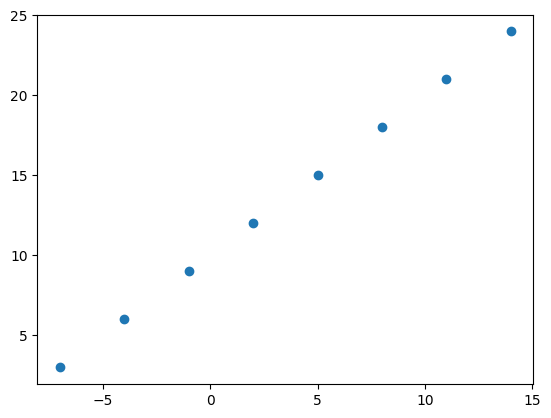

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10 # this is what we want the model to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for a housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price # input shape is 3 and output shape is 1

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # no shape or 0 dimension

((), ())

In [6]:
# Turn our NumPy array into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modeling in TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# We can also write it this way:
# model = tf.keras.Sequential()
# model.add(tf.keras.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8.2054 - mae: 8.2054
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 8.0729 - mae: 8.0729
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 7.9404 - mae: 7.9404
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 7.8079 - mae: 7.8079
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.6754 - mae: 7.6754


In [9]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0])) # Output should be 27, but it's far from it.
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


array([[28.741488]], dtype=float32)

## Improving the model

We can improve the model, by altering the steps we took to create the model.

1. **Creating a model** - here we might add more layers, increse the number of hidden units (neurons) within each of the hidden layer, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit  a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn on).

In [10]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.3637 - mae: 11.3637
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 11.2312 - mae: 11.2312
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 11.0987 - mae: 11.0987
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.9662 - mae: 10.9662
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 10.8337 - mae: 10.8337
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.7012 - mae: 10.7012
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.5687 - mae: 10.5687
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 10.4362 - mae: 10.4362
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.3037 - mae: 10.3037
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 10.1712 - mae: 10.1712
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.0387 - mae: 10.0387
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 9.9062 - mae: 9.9062
Epoch 13/100
1/1 ━━━━━━━━━━━

In [11]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[29.648878]], dtype=float32)

In [12]:
# Making another change to improve the model

# 1. Create the model with extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step - loss: 13.2650 - mae: 13.2650
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 12.7016 - mae: 12.7016
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 12.1364 - mae: 12.1364
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 11.5660 - mae: 11.5660
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.9824 - mae: 10.9824
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 10.3707 - mae: 10.3707
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 9.7388 - mae: 9.7388
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 9.0747 - mae: 9.0747
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 8.3723 - mae: 8.3723
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 7.6208 - mae: 7.6208
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 6.8235 - mae: 6.8235
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 5.9687 - mae: 5.9687
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [13]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
model.predict(np.array([17.0]))

# Loss is lower, but prediction is worse, it might be an overfitting

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[32.776344]], dtype=float32)

In [15]:
# Trying other optimizer and delete activation function

# 1. Create the model with extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.3122 - mae: 13.3122
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.3244 - mae: 12.3244
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.3289 - mae: 11.3289
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.3203 - mae: 10.3203
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.2911 - mae: 9.2911
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.2343 - mae: 8.2343
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.1434 - mae: 7.1434
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.7928 - mae: 6.7928
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.2333 - mae: 7.2333
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.6232 - mae: 7.6232
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.7122 - mae: 7.7122
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.5014 - mae: 7.5014
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27

In [16]:
model.predict(np.array([17.0])) # Best model so far

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[27.046438]], dtype=float32)

## Evaluating a model

In practice, a tyical workflow you'll go through when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

When it comes to evaluation:
> "Visualize, visulize, visualize"

It's a good idea to visualize:
* The data - what data are we working it? What does it look like?
* The model itself - what does our model look like?
* The training of the model - how does a model perform while it learns?
* The prediction of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [17]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

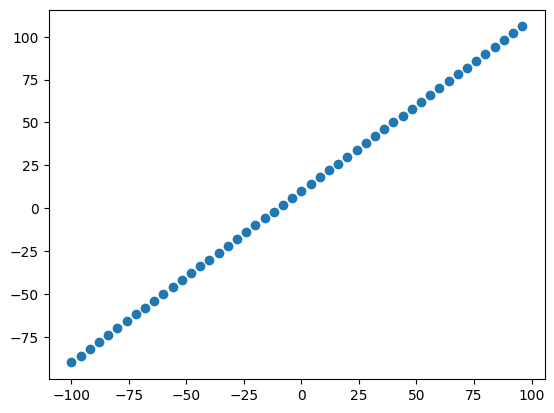

In [19]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available.
* **Validation set** - the model gets tunes on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [20]:
# Check the length of how many samples we have
len(X)

50

In [21]:
# We skip validation set for now and split the data into train and test set
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # Last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Let's visualize the data after splitting it into train and test set. It's always a good idea to visualize.

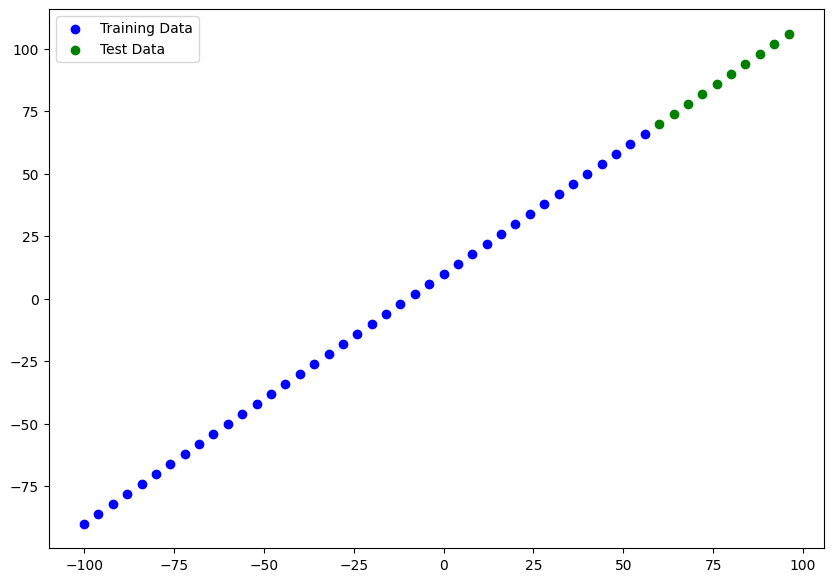

In [22]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test Data")
# Add legend
plt.legend()

In [23]:
# Create the neural network

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(tf.expand_dims(X_train), y_train, epochs=100)

### Visualizing the model


In [28]:
#model.summary() # will get error without building or fittin the model

In [67]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer.
# Sometimes the model can detect the input shape itself, but sometimes we must define it.

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # input_shape=[1] just passing one number
    tf.keras.layers.Dense(1, name="output_layer") # Output layer with 1 unit
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Dense - fully connected
* Total params - total number of parameters in the model.
* Trainable parameters - there are the parameters (patterns) the model can update as it trains.
* Non trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**.

**Resources:** MIT's introduction to deep learning videos.

In [68]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # If we run this two times, it means epochs=2*100, it will accumulate. To reset, run the model build again.

In [69]:
# Get a summary of our model again
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

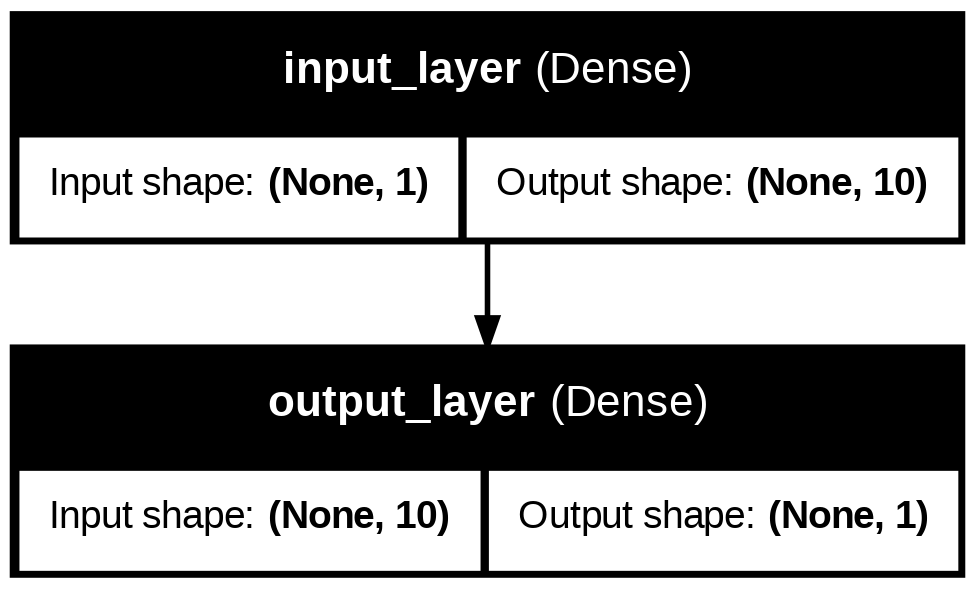

In [74]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True, show_layer_names=True)

### Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in form of `y_test` or `y_true` versus `y_pred` (ground truth versus model's predictions).

In [75]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[34.031635],
       [36.19681 ],
       [38.36199 ],
       [40.52716 ],
       [42.692337],
       [44.857517],
       [47.02269 ],
       [49.187866],
       [51.353046],
       [53.518223]], dtype=float32)

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [76]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()


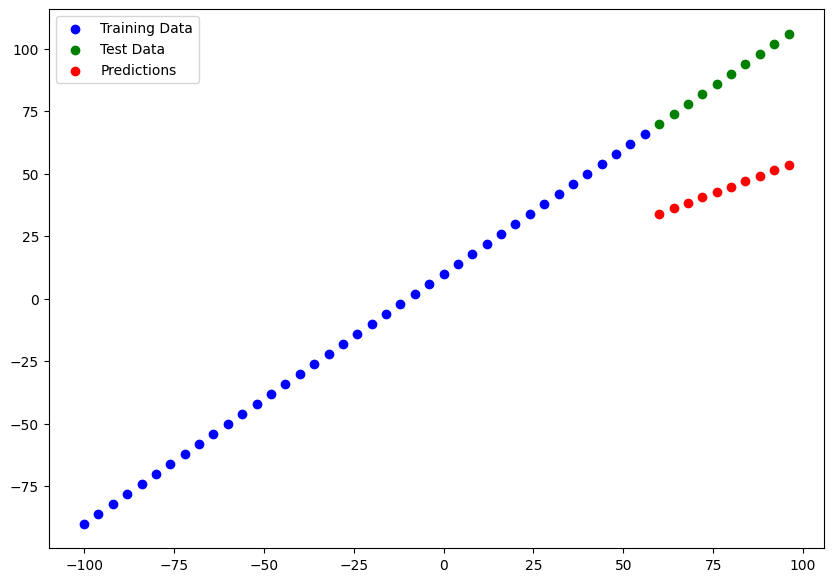

In [78]:
# Plot predictions
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating the model's predictions with regression evaluation metrics

Depending on the problem, there will be different evaluation metrics to evaluate the model's performance.

For regression, there are two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of the model's prediction".
* MSE - mean squared error, "square the average errors".

In [80]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step - loss: 44.2251 - mae: 44.2251


[44.225074768066406, 44.225074768066406]

In [89]:
# Calculate the mean absolute error
mae = tf.keras.losses.mae(y_true=y_test, y_pred=tf.squeeze(y_pred)) # y_test and y_pred have different shape, so we have to reshape or reduce dimension of y_pred
mae

<tf.Tensor: shape=(), dtype=float32, numpy=44.225075>

In [91]:
# Calculate the mean squared error
mse = tf.keras.losses.mse(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1983.6312>

In [107]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.mae(y_true=y_true,
                             y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.losses.mse(y_true=y_true,
                             y_pred=tf.squeeze(y_pred))

### Running experiments to improve the model

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


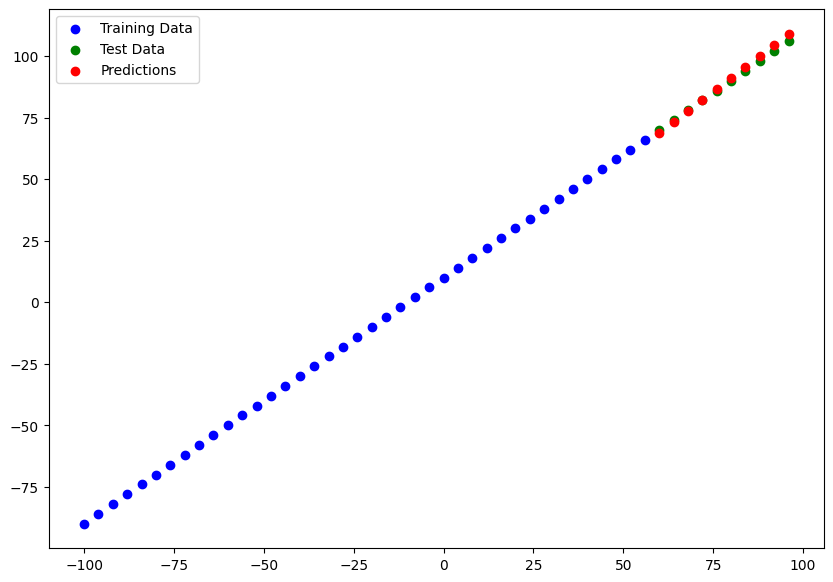

In [100]:
# Model_1 prediction
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [108]:
# Model_1 evaluation
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.3690193>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.708531>)

**Build `model_2`**

In [111]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(X_train, y_train, epochs=100, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


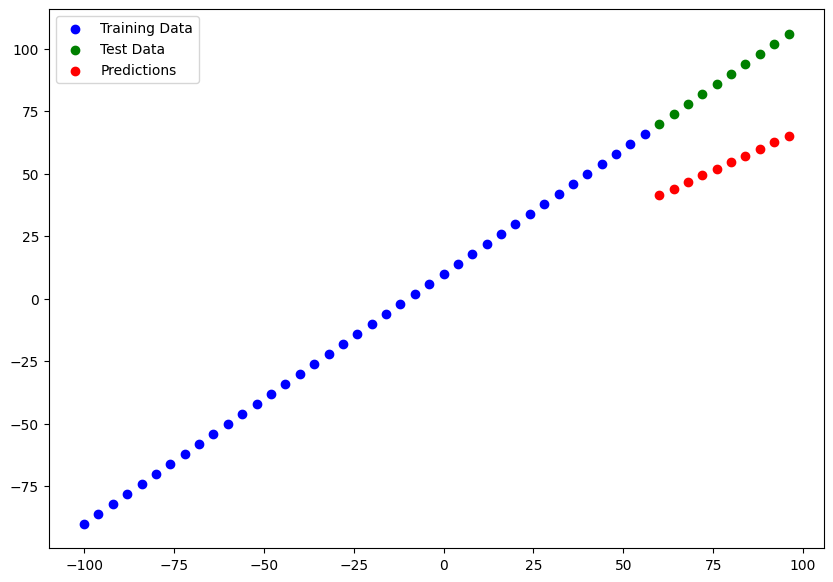

In [113]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [115]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=34.68365>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1218.3555>)

**Build `model_3`**

In [116]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_3.fit(X_train, y_train, epochs=500, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


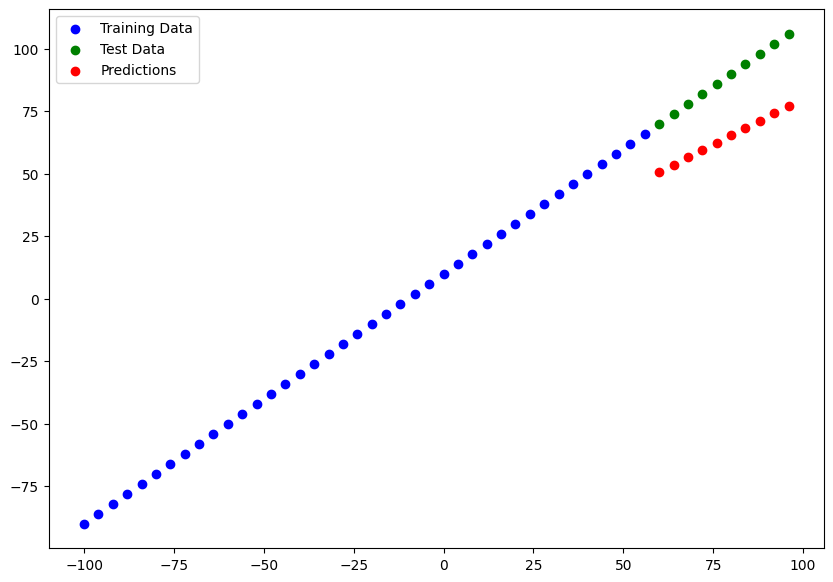

In [117]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [118]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=24.08711>,
 <tf.Tensor: shape=(), dtype=float32, numpy=589.5267>)

## Comparing the results of our experiments